## Gather

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt

In [2]:
# Importing WeRateDogs Twitter archive
ta = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Importing tweet image predictions from Udacity's servers
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# Get file from Udacity's servers
r = requests.get(url)
# Write file locally
with open('image_predictions.tsv', 'wb') as file:  
    file.write(r.content)
# Import file to DataFrame
tip = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
# Importing additional tweets data with tweepy library for Twitter API
consumer_key = "PUT_YOUR_OWN_KEY"
consumer_secret = "PUT_YOUR_OWN_KEY"
access_token = "PUT_YOUR_OWN_KEY"
access_token_secret = "PUT_YOUR_OWN_KEY"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Authonticate with Twitter API and set wait on rate limit to be able to query more tweets
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# Query tweets using Tweepy library and write tweets as JSON objects in a txt file
not_found = []
error = []
count = 0
with open("tweet_json.txt", "w") as file:
    for tweet_id in ta.tweet_id:
        # Catch and document Exceptions
        try:
            tweet_status = api.get_status(tweet_id)
            tweet_json = tweet_status._json
            file.write(json.dumps(tweet_json)+"\n")
        except Exception as e:
            not_found.append(tweet_id)
            error.append(str(e))

In [6]:
# Load JSON objects into a Dictionary form text file
with open("tweet_json.txt", "r") as file:
    tweet_dict = {'tweet_id': [], 'retweet_count': [], 'favorite_count': [], 'lang': []}
    for line in file:
        json_obj = json.loads(line)
        tweet_dict['tweet_id'].append(json_obj['id'])
        tweet_dict['retweet_count'].append(json_obj['retweet_count'])
        tweet_dict['favorite_count'].append(json_obj['favorite_count'])
        tweet_dict['lang'].append(json_obj['lang'])

# Convert Dictionery into DataFrame
taad = pd.DataFrame(tweet_dict)

## Assess

In [7]:
ta.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1651,683498322573824003,NaN,NaN,2016-01-03 04:01:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Griffin. He's desperate for both a phy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683498322...,11,10,Griffin,None,None,None,None
1868,675166823650848770,NaN,NaN,2015-12-11 04:14:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arnold. He broke his leg saving a hand...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675166823...,10,10,Arnold,None,None,None,None
844,766693177336135680,NaN,NaN,2016-08-19 17:47:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brudge. He's a Doberdog. Going to be h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766693177...,11,10,Brudge,None,None,None,None
303,836397794269200385,NaN,NaN,2017-02-28 02:09:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Buddy. He ran into a gl...,8.178278e+17,4.196984e+09,2017-01-07 20:18:46 +0000,https://twitter.com/dog_rates/status/817827839...,13,10,Buddy,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
1822,676575501977128964,NaN,NaN,2015-12-15 01:32:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is very passionate about Christmas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676575501...,8,10,None,None,None,pupper,None
1336,705223444686888960,NaN,NaN,2016-03-03 02:49:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bode. He's a heavy sleeper. 9/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705223444...,9,10,Bode,None,None,None,None


In [8]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
ta.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
ta.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
ta.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
ta.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Toby           7
Buddy          7
Bailey         7
Daisy          7
Scout          6
Rusty          6
Stanley        6
Bella          6
Leo            6
Koda           6
Jax            6
Jack           6
Dave           6
Milo           6
Oscar          6
very           5
            ... 
Jonah          1
Rover          1
Diogi          1
Philippe       1
Angel          1
Bruno          1
Ralphie        1
Stark          1
Chase          1
Banjo          1
Cuddles        1
Patch          1
River          1
Rey            1
Rizzo          1
Keet           1
Amélie         1
Kayla          1
Emanuel        1
Millie         1
Link           1
Walker         1
Lucky          1
Ralf           1
Nugget         1
O              1
Sid            1
Eugene        

In [13]:
tip.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
257,670778058496974848,https://pbs.twimg.com/media/CU8VFhuVAAAQW8B.jpg,1,pug,0.776612,True,Brabancon_griffon,0.112032,True,boxer,0.039051,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
647,681679526984871937,https://pbs.twimg.com/media/CXXP5O4WEAA4dgS.jpg,1,birdhouse,0.472351,False,teddy,0.142058,False,pot,0.032906,False
340,672248013293752320,https://pbs.twimg.com/media/CVROAIfWsAECA5t.jpg,1,Irish_terrier,0.413173,True,Airedale,0.335616,True,toy_poodle,0.027952,True
1625,803773340896923648,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2,miniature_pinscher,0.817066,True,redbone,0.059707,True,Irish_terrier,0.034195,True
358,672614745925664768,https://pbs.twimg.com/media/CVWbitUW4AAzclx.jpg,1,starfish,0.712717,False,goldfish,0.258865,False,sea_cucumber,0.002015,False


In [14]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
tip.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [16]:
tip[tip['p1_dog']==True].p1.value_counts().sort_index()

Afghan_hound                        4
Airedale                           12
American_Staffordshire_terrier     13
Appenzeller                         2
Australian_terrier                  2
Bedlington_terrier                  5
Bernese_mountain_dog               10
Blenheim_spaniel                   11
Border_collie                      12
Border_terrier                      7
Boston_bull                         9
Brabancon_griffon                   3
Brittany_spaniel                    7
Cardigan                           19
Chesapeake_Bay_retriever           23
Chihuahua                          83
Dandie_Dinmont                      6
Doberman                            8
English_setter                      8
English_springer                   10
EntleBucher                         1
Eskimo_dog                         18
French_bulldog                     26
German_shepherd                    20
German_short-haired_pointer         7
Gordon_setter                       4
Great_Dane  

In [17]:
taad.sample(3)

,tweet_id,retweet_count,favorite_count,lang
393,823699002998870016,2675,14536,en
1623,683857920510050305,1170,3935,en
84,876120275196170240,4516,27128,en


In [18]:
taad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 4 columns):
tweet_id          2335 non-null int64
retweet_count     2335 non-null int64
favorite_count    2335 non-null int64
lang              2335 non-null object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [19]:
taad.describe()

,tweet_id,retweet_count,favorite_count
count,2.335000e+03,2335.000000,2335.000000
mean,7.420286e+17,2871.484368,7829.844111
std,6.823632e+16,4849.049415,12139.513975
min,6.660209e+17,1.000000,0.000000
25%,6.783065e+17,578.500000,1354.500000
50%,7.184600e+17,1346.000000,3403.000000
75%,7.986778e+17,3346.000000,9592.500000
max,8.924206e+17,82240.000000,161851.000000


In [20]:
taad[taad['favorite_count'] == 0]

,tweet_id,retweet_count,favorite_count,lang
31,886054160059072513,105,0,und
35,885311592912609280,17840,0,en
67,879130579576475649,6566,0,en
72,878404777348136964,1241,0,en
73,878316110768087041,6417,0,en
77,877611172832227328,78,0,en
90,874434818259525634,14227,0,en
95,873337748698140672,1539,0,en
105,871166179821445120,5555,0,en
119,868639477480148993,2053,0,en


In [21]:
not_found

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 847617282490613760,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 731285275100512256,
 680055455951884288]

### Quality
##### `Twitter Archive` table
* Reply and retweet tweets are present in the Twitter Archive data
* timestamp and retweeted_status_timestamp columns type should be datetime
* The rating_denominator can't have 0's, but the describe method shows that it does
* In the dog type columns, some entries have more than one dog type
* Missing data in the name column should be nulls not "None"
* Wrong data in the name column with values like "a", "the", and "an"
* Errorneous datatypes (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id columns)

##### `Image Predictions` table
* Lowercase and uppercase in the breeds columns (p1, p2, and p3), also '_' instead of spaces

##### `Twitter API` table
* 17 entries less than the entries from the Twitter Archive
* Some entries have 0 favorite_count which seems weird (https://twitter.com/i/web/status/886053434075471873)

### Tidiness
* In the first DataFrame (ta) these 4 columns (doggo, floofer, pupper, and puppo) should be represneted by 1 column since they represent 1 variable
* The 3 tables should be combined in to one

## Clean

In [22]:
# Make copies of the DataFrames
ta_copy = ta.copy()
tip_copy = tip.copy()
taad_copy = taad.copy()

### Tidiness

#### Define

Merge the 3 tables into 1 DataFrame based on using the tweet_id columns

#### Clean

In [23]:
# Join the Twitter Archive and the Image Prediction tables using a left join
ta_tip = pd.merge(ta_copy, tip_copy, on='tweet_id', how='left')
# Join the new table with the Twitter API table using a left join
df = pd.merge(ta_tip, taad_copy, on='tweet_id', how='left')

#### Test

In [24]:
# Display the first 3 rows of the DataFrame
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,lang
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8162.0,37471.0,en
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6042.0,32216.0,en
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,3999.0,24281.0,en


In [25]:
# Display the information of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

#### Define

Melt the 4 columns (doggo, floofer, pupper, and puppo) in to 1 column since they represent 1 variable, and ignore the ones that have more than one dog type.

#### Clean

In [26]:
# Melt the 4 columns of the dog types and save them to a new DataFrame
df2 = pd.melt(df, id_vars=['tweet_id'], 
        value_vars=['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name='dog_type_all', value_name='dog_type')

In [27]:
# Remove the columns without any dog types
df2 = df2[df2['dog_type'] != "None"]

In [28]:
# Remove the entries that have more than one dog type
df2 = df2[np.logical_not(df2.tweet_id.duplicated())]

In [29]:
# Join the new DataFrame to the orginal DataFrame uing left join
df = pd.merge(df, df2, on='tweet_id', how='left')

In [30]:
# Drop old dog type columns
df = df.drop(['dog_type_all', 'doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [31]:
# Display the information of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                        

In [32]:
# Display the value counts for the dog_type column
df.dog_type.value_counts()

pupper     245
doggo       97
puppo       29
floofer      9
Name: dog_type, dtype: int64

### Quality

#### Define

Remove the 17 entries that were not found with the Twitter API from the Twitter Archive table

#### Clean

In [33]:
# Drop the rows with tweet_id in the not_found list
df = df[np.logical_not(df['tweet_id'].isin(not_found))]

#### Test

In [34]:
# Try to lookup the row with one of the not found ids
df[df['tweet_id'] == not_found[0]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,lang,dog_type


#### Define
Fix data types for tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id, timestamp, retweeted_status_timestamp, img_num, p1_dog, p2_dog, p3_dog, retweet_count, favorite_count, lang, and dog_type

In [35]:
# Display the information of the DataFrame before changing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2335 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2335 non-null object
source                        2335 non-null object
text                          2335 non-null object
retweeted_status_id           166 non-null float64
retweeted_status_user_id      166 non-null float64
retweeted_status_timestamp    166 non-null object
expanded_urls                 2277 non-null object
rating_numerator              2335 non-null int64
rating_denominator            2335 non-null int64
name                          2335 non-null object
jpg_url                       2064 non-null object
img_num                       2064 non-null float64
p1                            2064 non-null object
p1_conf                       2064 non-null float64
p1_dog                        

#### Clean

In [36]:
# Change the data types
df = df.astype({"tweet_id": str, 
                "in_reply_to_status_id": str,
                "in_reply_to_user_id": str,
                "retweeted_status_id": str,
                "retweeted_status_user_id": str,
                "img_num": 'category',
                "p1_dog": bool,
                "p2_dog": bool,
                "p3_dog": bool,
                "retweet_count": int,
                "favorite_count": int,
                "lang": 'category',
                "dog_type": 'category'}, errors = 'ignore')

In [37]:
# Change the time based columns to datatime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['retweeted_status_timestamp'] = pd.to_datetime(df['retweeted_status_timestamp'])

#### Test

In [38]:
# Display the information of the DataFrame after changing the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2335 non-null object
in_reply_to_status_id         2335 non-null object
in_reply_to_user_id           2335 non-null object
timestamp                     2335 non-null datetime64[ns]
source                        2335 non-null object
text                          2335 non-null object
retweeted_status_id           2335 non-null object
retweeted_status_user_id      2335 non-null object
retweeted_status_timestamp    166 non-null datetime64[ns]
expanded_urls                 2277 non-null object
rating_numerator              2335 non-null int64
rating_denominator            2335 non-null int64
name                          2335 non-null object
jpg_url                       2064 non-null object
img_num                       2064 non-null category
p1                            2064 non-null object
p1_conf                       2064 non-null float64
p1_dog    

#### Define
Remove the reply and retweet tweets from the DataFrame

#### Clean

In [39]:
df['in_reply_to_status_id'].value_counts()['nan']

2258

In [40]:
# Drop the rows with any value in the in_reply_to_status_id and retweeted_status_id columns
df = df[df['in_reply_to_status_id'] == "nan"]
df = df[df['retweeted_status_id'] == "nan"]

#### Test

In [41]:
# Check the number of non-null values in the in_reply_to_status_id and retweeted_status_id columns
len(df[df['in_reply_to_status_id'] != "nan"]), len(df[df['retweeted_status_id'] != "nan"])

(0, 0)

In [42]:
# Remove unneeded rows
df = df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Define

Remove the errorneous names from the name column, this includes things like "a", "an" and the "None" as a string.

#### Clean

In [43]:
# Apply a lambda function that replaces the "None" and the lowercase strings with nulls
df['name'] = df['name'].apply(lambda x: None if (x.islower()) | (x == "None") else x)

#### Test

In [44]:
# Check the value counts for the names column
df.name.value_counts()

Lucy              11
Cooper            10
Charlie           10
Oliver            10
Tucker             9
Penny              9
Winston            8
Sadie              8
Lola               8
Daisy              7
Toby               7
Stanley            6
Bailey             6
Bella              6
Koda               6
Jax                6
Bo                 6
Oscar              6
Milo               5
Chester            5
Louis              5
Dave               5
Buddy              5
Scout              5
Leo                5
Rusty              5
Bentley            5
Phil               4
Derek              4
Brody              4
                  ..
Chompsky           1
Deacon             1
Taz                1
Sid                1
Sailor             1
Chase              1
Kayla              1
Amélie             1
Chevy              1
Michelangelope     1
Horace             1
Todo               1
Harnold            1
Bloo               1
Sunshine           1
Shiloh             1
Storkson     

In [45]:
# Test some of the values to be sure they are not there
df[np.logical_or(df['name'] == 'a', df['name'] == 'None')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,lang,dog_type


#### Define

Fix the formatting for the breeds columns (p1, p2, and p3) and replace '_' with spaces

#### Clean

In [46]:
# Apply a lambda function that replaces the "_"  with " " and converts the string to title case
df[['p1','p2','p3']] = df[['p1','p2','p3']].apply(lambda x: x.str.replace("_", " ").str.title())

#### Test

In [47]:
# Display the 3 columns
df[['p1','p2','p3']]

,p1,p2,p3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper Towel,Labrador Retriever,Spatula
4,Basset,English Springer,German Short-Haired Pointer
5,Chesapeake Bay Retriever,Irish Terrier,Indian Elephant
6,Appenzeller,Border Collie,Ice Lolly
7,Pomeranian,Eskimo Dog,Pembroke
8,Irish Terrier,Irish Setter,Chesapeake Bay Retriever
9,Pembroke,Cardigan,Chihuahua


#### Define

The rating_denominator can't have 0's, but the describe method shows that it does

#### Clean

The issue was in the data for replies so no need to take any further actions

#### Test

In [48]:
# Check if there are any rows with 0's in the rating_denominator column
df[df['rating_denominator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,lang,dog_type


#### Define

Entries have 0 favorite_count

#### Clean

The issue was in the data for retweeted data so no need to take any further actions

#### Test

In [49]:
# Check if there are any rows with 0's in the favorite_count column
df[df['favorite_count'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,lang,dog_type


## Storing the data

In [50]:
# Store the DataFrame in to a csv file
df.to_csv('twitter_archive_master.csv', index=False)

## Analysis and visualization

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              2092 non-null object
timestamp             2092 non-null datetime64[ns]
source                2092 non-null object
text                  2092 non-null object
expanded_urls         2089 non-null object
rating_numerator      2092 non-null int64
rating_denominator    2092 non-null int64
name                  1385 non-null object
jpg_url               1966 non-null object
img_num               1966 non-null category
p1                    1966 non-null object
p1_conf               1966 non-null float64
p1_dog                2092 non-null bool
p2                    1966 non-null object
p2_conf               1966 non-null float64
p2_dog                2092 non-null bool
p3                    1966 non-null object
p3_conf               1966 non-null float64
p3_dog                2092 non-null bool
retweet_count         2092 non-null int64
favorite_count        2092 no

In [52]:
df.describe()

,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2092.000000,2092.000000,1966.000000,1.966000e+03,1.966000e+03,2092.000000,2092.000000
mean,12.189771,10.449809,0.593773,1.347689e-01,6.028288e-02,2669.588910,8656.409178
std,40.413191,6.652965,0.271919,1.009747e-01,5.094157e-02,4667.866843,12551.409655
min,0.000000,2.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,76.000000
25%,10.000000,10.000000,0.362857,5.387868e-02,1.621080e-02,591.000000,1922.000000
50%,11.000000,10.000000,0.587357,1.174550e-01,4.947920e-02,1294.500000,3948.000000
75%,12.000000,10.000000,0.846285,1.955693e-01,9.159438e-02,3035.750000,10789.750000
max,1776.000000,170.000000,1.000000,4.880140e-01,2.734190e-01,82240.000000,161851.000000


In [53]:
# Get the value of the first timestamp after sorting
df.timestamp.sort_values().iloc[0]

Timestamp('2015-11-15 22:32:08')

In [54]:
# Divide the number of 'en' values by all the non-null values
df.lang.value_counts()['en'] / len(df[~df['lang'].isnull()])

0.9961759082217974

In [55]:
# Get the count of the differnet values
df.name.value_counts()

Lucy              11
Cooper            10
Charlie           10
Oliver            10
Tucker             9
Penny              9
Winston            8
Sadie              8
Lola               8
Daisy              7
Toby               7
Stanley            6
Bailey             6
Bella              6
Koda               6
Jax                6
Bo                 6
Oscar              6
Milo               5
Chester            5
Louis              5
Dave               5
Buddy              5
Scout              5
Leo                5
Rusty              5
Bentley            5
Phil               4
Derek              4
Brody              4
                  ..
Chompsky           1
Deacon             1
Taz                1
Sid                1
Sailor             1
Chase              1
Kayla              1
Amélie             1
Chevy              1
Michelangelope     1
Horace             1
Todo               1
Harnold            1
Bloo               1
Sunshine           1
Shiloh             1
Storkson     

In [56]:
# Divide the number of 'pupper' values by all the non-null values
df.dog_type.value_counts()['pupper'] / len(df[~df['dog_type'].isnull()])

0.6577380952380952

In [57]:
# Create a temp Series by dividing the numerator by the denominator for the ratings and getting its' max value
max(df.rating_numerator / df.rating_denominator) * 100

17760.0

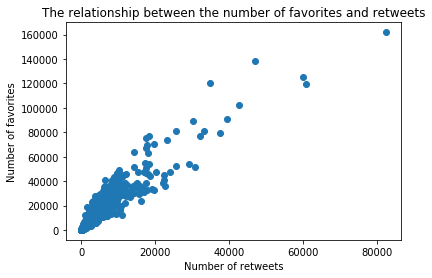

In [58]:
# Plot a scatter plot between the number of favorites and retweets
plt.scatter(x = df.retweet_count, y = df.favorite_count)
# Add the title and labels
plt.title("The relationship between the number of favorites and retweets")
plt.xlabel("Number of retweets")
plt.ylabel("Number of favorites")
# Save the plot as an image
plt.savefig('fig-1.png', bbox_inches='tight')

In [59]:
# Calculate Pearson correlation coefficient for the number of favorites and retweets
np.corrcoef(df.retweet_count, df.favorite_count)

array([[1.        , 0.92718879],
       [0.92718879, 1.        ]])